#  <font color='purple'>Projet 9: Produisez une étude de marché avec R ou Python

# Table of Contents

* **[Mise en place du jeu de données](#chapter1)**
    * [Importation des librairies](#section_1_1)
    * [Chargement et  préparation des données](#section_1_2)
    * [Matrice de corrélation entre les variables](#section_1_3)
* **[Analyse en Composante Principale(ACP)](#chapter2)**
    * [Eboulis des valeurs propres](#section_2_1)
    * [Analyse des composantes principales](#section_2_2)
    * [Cercle des corrélations](#section_2_3)
    * [Projection des individus](#section_2_4)
* **[Classification Ascendante Hiérarchique(CAH)](#chapter3)**
    * [Construction et analyse du dendrogramme](#section_3_1)
    * [Analyse des centroïdes des clusters](#section_3_2)
    * [Heatmap de clusters](#section_3_3)
    * [Boxplot de clustering](#section_3_4)
    * [Affichage des pays cibles](#section_3_5)
* **[Clustering avec K-means ](#chapter4)** 
    * [Détermination du nombre de clusters optimal](#section_4_1)
    * [Visualisation des clusters K-means via ACP](#section_4_2)
    * [Analyse des centroïdes des clusters ](#section_4_3)
    * [Heatmap de clusters](#section_4_4)
    * [Boxplot de clustering](#section_4_5)
    * [Affichage des pays cibles](#section_4_6)
* **[Conclusion](#chapter5)**   

# <font color='blue'>Mise en place du jeu de données <a class="anchor" id="chapter1"></a>

## <font color='purple'>Importation des librairies <a class="anchor" id="section_1_1"></a>

In [245]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import decomposition, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster, metrics
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import confusion_matrix


# No warnings
import warnings
warnings.filterwarnings("ignore")

In [247]:
pip install -U kaleido

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## <font color='purple'>Chargement et préparation des données <a class="anchor" id="section_1_2"></a>

In [248]:
df_poulet = pd.read_csv('df_poulet.csv')

In [249]:
df_poulet

,Unnamed: 0,Zone,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique
0,0,Afghanistan,36296113,1.53,-1.53,29.0,50.877193,530.149831,-2.80
1,1,Afrique du Sud,57009756,35.69,63.00,514.0,24.268178,6723.928582,-0.28
2,2,Albanie,2884169,16.36,0.00,38.0,80.851064,4521.752219,0.38
3,3,Algérie,41389189,6.38,0.00,2.0,0.722022,4134.936054,-0.92
4,4,Allemagne,82658409,19.47,646.00,842.0,48.418631,44670.222288,0.59
...,...,...,...,...,...,...,...,...,...
159,159,Égypte,96442591,12.96,1.00,110.0,8.800000,1917.049576,-1.42
160,160,Émirats arabes unis,9487203,43.47,94.00,433.0,105.097087,42522.377622,0.62
161,161,Équateur,16785361,19.31,0.00,0.0,0.000000,6246.404252,-0.07
162,162,Éthiopie,106399924,0.13,0.87,1.0,7.142857,709.761008,-1.68


In [250]:
# Suppression de la colonne 'UNnnamed:0' et définition de 'Zone' comme index
df_poulet = df_poulet.drop(columns=['Unnamed: 0']).set_index('Zone')
df_poulet

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique
Zone,,,,,,,
Afghanistan,36296113,1.53,-1.53,29.0,50.877193,530.149831,-2.80
Afrique du Sud,57009756,35.69,63.00,514.0,24.268178,6723.928582,-0.28
Albanie,2884169,16.36,0.00,38.0,80.851064,4521.752219,0.38
Algérie,41389189,6.38,0.00,2.0,0.722022,4134.936054,-0.92
Allemagne,82658409,19.47,646.00,842.0,48.418631,44670.222288,0.59
...,...,...,...,...,...,...,...
Égypte,96442591,12.96,1.00,110.0,8.800000,1917.049576,-1.42
Émirats arabes unis,9487203,43.47,94.00,433.0,105.097087,42522.377622,0.62
Équateur,16785361,19.31,0.00,0.0,0.000000,6246.404252,-0.07


## <font color='purple'>Matrice de corrélation entre les variables <a class="anchor" id="section_1_3"></a>

In [251]:
# Elaboration de la matrice de corrélation entre les variables
# Calcul de la corrélation de Spearman
correlation_spearman = df_poulet.corr(method='spearman')

# Affichage du résultat
correlation_spearman

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique
Population totale,1.000000,-0.262500,0.265799,0.164974,-0.565505,-0.183072,-0.527865
Dispo alimentaire(kg/pers/an),-0.262500,1.000000,0.366515,0.372458,0.150616,0.703848,0.498139
Exportations - Quantité,0.265799,0.366515,1.000000,0.473955,-0.029196,0.530775,0.201260
Importations - Quantité,0.164974,0.372458,0.473955,1.000000,0.515623,0.406368,0.187803
Dép_importations(%),-0.565505,0.150616,-0.029196,0.515623,1.000000,0.188335,0.382364
PIB par habitant,-0.183072,0.703848,0.530775,0.406368,0.188335,1.000000,0.674211
Stabilité politique,-0.527865,0.498139,0.201260,0.187803,0.382364,0.674211,1.000000


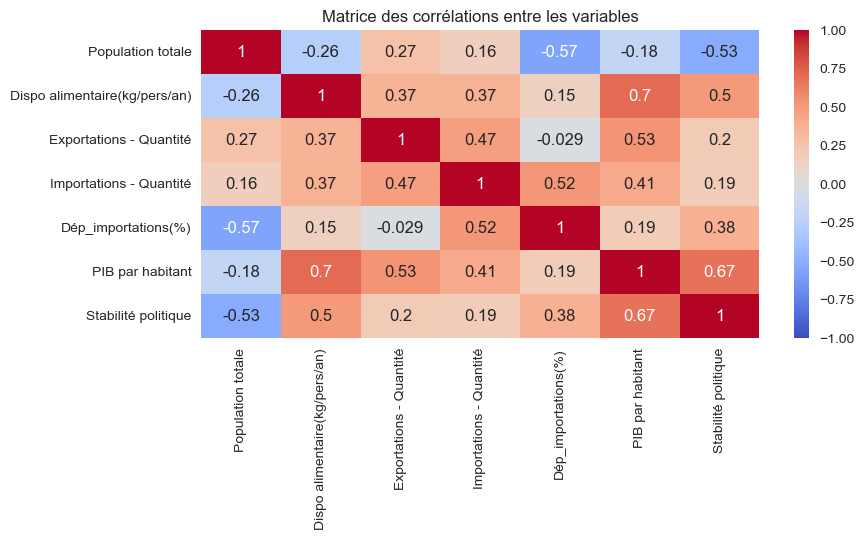

In [252]:
# Affichage de la matrice de corrélation entre les variables
plt.figure(figsize=(9,4))
sns.heatmap(df_poulet.corr('spearman'),cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.title('Matrice des corrélations entre les variables')
plt.savefig('matrice de corrélation.png', dpi=300, bbox_inches='tight')
plt.show()

**Interprétation de la matrice de corrélation**
* La Population totale a une corrélation négative assez faible avec la disponibilité alimentaire en quantité (-0.26) et moyenne avec la stabilité politique (-0.53) et la dépendance aux importations(-57).Cela indique que les pays ayant de plus grandes populations tendent à avoir une disponibilité alimentaire moindre, une stabilité politique potentiellement réduite, et une faible dépendance aux importations de volailles.


* La disponibilité alimentaire montre une corrélation modérée de 0.37 avec les exportations et importations, indiquant une relation significative entre le commerce extérieur et l'accès à la nourriture. En outre, elle présente une forte corrélation avec le PIB par habitant (0.7) et la stabilité politique (0.5), ce qui laisse supposer que les pays ayant une économie plus robuste et une plus grande stabilité politique tendent à bénéficier d'une disponibilité alimentaire supérieure par personne.


* Les exportations et les importations affichent une corrélation modérée de 0.47, suggérant que les pays qui exportent davantage ont également tendance à importer plus. De plus, une corrélation assez solide de 0.53 est observée avec le PIB, indiquant que les volumes d'exportations sont généralement plus élevés dans les pays plus prospères.


* Les importations présentent une corrélation significative de 0.52 avec la dépendance aux importations, ce qui révèle que les pays important le plus de volailles sont fortement dépendants de ces produits importés.


* Le PIB par habitant est fortement corrélé avec la stabilité politique (0.67), ce qui suggère que les pays avec un PIB par habitant plus élevé ont tendance à être politiquementplus stables.

# <font color='blue'>Analyse en Composante Principale(ACP) <a class="anchor" id="chapter2"></a>

In [253]:
# Création de la matrice des données
X = df_poulet.values
X[:5]

array([[ 3.62961130e+07,  1.53000000e+00, -1.53000000e+00,
         2.90000000e+01,  5.08771930e+01,  5.30149831e+02,
        -2.80000000e+00],
       [ 5.70097560e+07,  3.56900000e+01,  6.30000000e+01,
         5.14000000e+02,  2.42681775e+01,  6.72392858e+03,
        -2.80000000e-01],
       [ 2.88416900e+06,  1.63600000e+01,  0.00000000e+00,
         3.80000000e+01,  8.08510638e+01,  4.52175222e+03,
         3.80000000e-01],
       [ 4.13891890e+07,  6.38000000e+00,  0.00000000e+00,
         2.00000000e+00,  7.22021661e-01,  4.13493605e+03,
        -9.20000000e-01],
       [ 8.26584090e+07,  1.94700000e+01,  6.46000000e+02,
         8.42000000e+02,  4.84186314e+01,  4.46702223e+04,
         5.90000000e-01]])

In [254]:
type(X)

numpy.ndarray

On a bien obtenu un np.array qui nous permettra de réaliser notre ACP

In [255]:
# Enregistrement de nos zones ans la variables 'names'
names = df_poulet.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe', 'Égypte', 'Émirats arabes unis', 'Équateur', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=164)

In [256]:
# Enregistrement de nos colonnes dans la variables 'features'
features = df_poulet.columns
features

Index(['Population totale', 'Dispo alimentaire(kg/pers/an)',
       'Exportations - Quantité', 'Importations - Quantité',
       'Dép_importations(%)', 'PIB par habitant', 'Stabilité politique'],
      dtype='object')

In [257]:
# Centrage et Réduction des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
# Vérification grâce à la méthode .describe que la moyenne est bien égale à 0 et l'écart-type 1.
pd.DataFrame(X_scaled).describe().round(2).iloc[1:3:, : ]

,0,1,2,3,4,5,6
mean,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


On obtient bien une moyenne à 0 et un écart type à 1, confirmznt que nos variables sont bien centrées et normalisées. Nous pouvons maintenant procéder à l'exécution de notre ACP normée.

## <font color='purple'>Eboulis des valeurs propres <a class="anchor" id="section_2_1"></a>

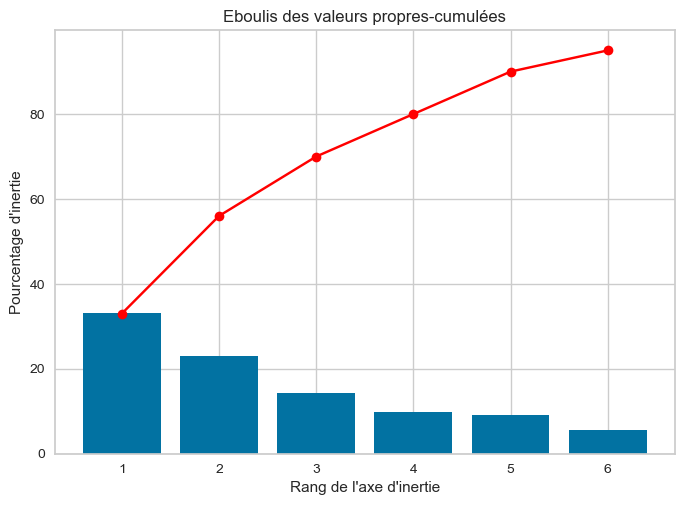

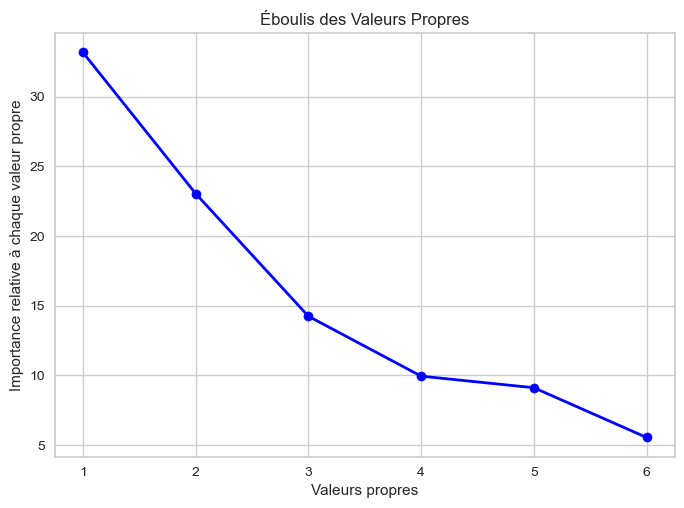

In [258]:
# Choix du nombre de composantes à calculer
n_components = 6

# ACP
pca = decomposition.PCA(n_components=n_components)
pca.fit_transform(X_scaled)

# Calcul de la variance captée par chaque nouvelle composante
scree = (pca.explained_variance_ratio_*100).round(2)
# Variance expliquée cumulée
scree_cum = scree.cumsum().round()

# Création de liste des composantes 
x_list = range(1, n_components+1)


# Création du  Scree plot
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres-cumulées")
plt.savefig('Eboulisc.png', dpi=300, bbox_inches='tight')
plt.show(block=False)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, scree, 'o-', linewidth=2, color='blue')
plt.title('Éboulis des Valeurs Propres')
plt.xlabel('Valeurs propres')
plt.ylabel('Importance relative à chaque valeur propre')
plt.savefig('Eboulis.png', dpi=300, bbox_inches='tight')
plt.show()

Pour le graphique de l'éboulis des valeurs propres cumulées,en bleu on a la variance de chaque nouvelle composante et en rouge la variance cumulée.
On observe ici, que près de 60% de la variance est compris entre les 2 premières composantes , et de 80% entre les 4 premières.
Toutefois le graphique de l'éboulis des valeurs propres nous montre qu'à plus de quatre composantes, les informmations ne sont plus très significatives.

## <font color='purple'>Analyse des composantes principales <a class="anchor" id="section_2_2"></a>

In [259]:
# Nous allons donc travailler sur les 4 premières composantes qui correspondantes à 80% de notre variance.
n_components= 4
pca=PCA(n_components=n_components)
# On fit nos données 
pca.fit(X_scaled)

PCA(n_components=4)

In [260]:
# Création de liste des composantes 
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

In [261]:
# Calcul des différentes composantes
pcs = pca.components_
pcs

array([[-0.2538641 ,  0.43525351,  0.22688896,  0.25589635,  0.33790706,
         0.48385578,  0.52995119],
       [ 0.59609808,  0.00344491,  0.4962768 ,  0.56791949, -0.11387571,
         0.10532303, -0.22753325],
       [-0.21653663, -0.37584777,  0.1771624 ,  0.22136578,  0.77156852,
        -0.32673025, -0.17143623],
       [-0.19267807, -0.47849175,  0.6650875 , -0.42247551, -0.18557627,
         0.26257604,  0.09853491]])

In [262]:
# Création d'un Dataframe
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,-0.253864,0.435254,0.226889,0.255896,0.337907,0.483856,0.529951
1,0.596098,0.003445,0.496277,0.567919,-0.113876,0.105323,-0.227533
2,-0.216537,-0.375848,0.177162,0.221366,0.771569,-0.326730,-0.171436
3,-0.192678,-0.478492,0.665088,-0.422476,-0.185576,0.262576,0.098535


In [263]:
# Affichage avec les noms des variables correspondantes
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique
F1,-0.25,0.44,0.23,0.26,0.34,0.48,0.53
F2,0.60,0.00,0.50,0.57,-0.11,0.11,-0.23
F3,-0.22,-0.38,0.18,0.22,0.77,-0.33,-0.17
F4,-0.19,-0.48,0.67,-0.42,-0.19,0.26,0.10


In [264]:
# Autre façon d'afficher le dataframe
pcs.T

,F1,F2,F3,F4
Population totale,-0.253864,0.596098,-0.216537,-0.192678
Dispo alimentaire(kg/pers/an),0.435254,0.003445,-0.375848,-0.478492
Exportations - Quantité,0.226889,0.496277,0.177162,0.665088
Importations - Quantité,0.255896,0.567919,0.221366,-0.422476
Dép_importations(%),0.337907,-0.113876,0.771569,-0.185576
PIB par habitant,0.483856,0.105323,-0.326730,0.262576
Stabilité politique,0.529951,-0.227533,-0.171436,0.098535


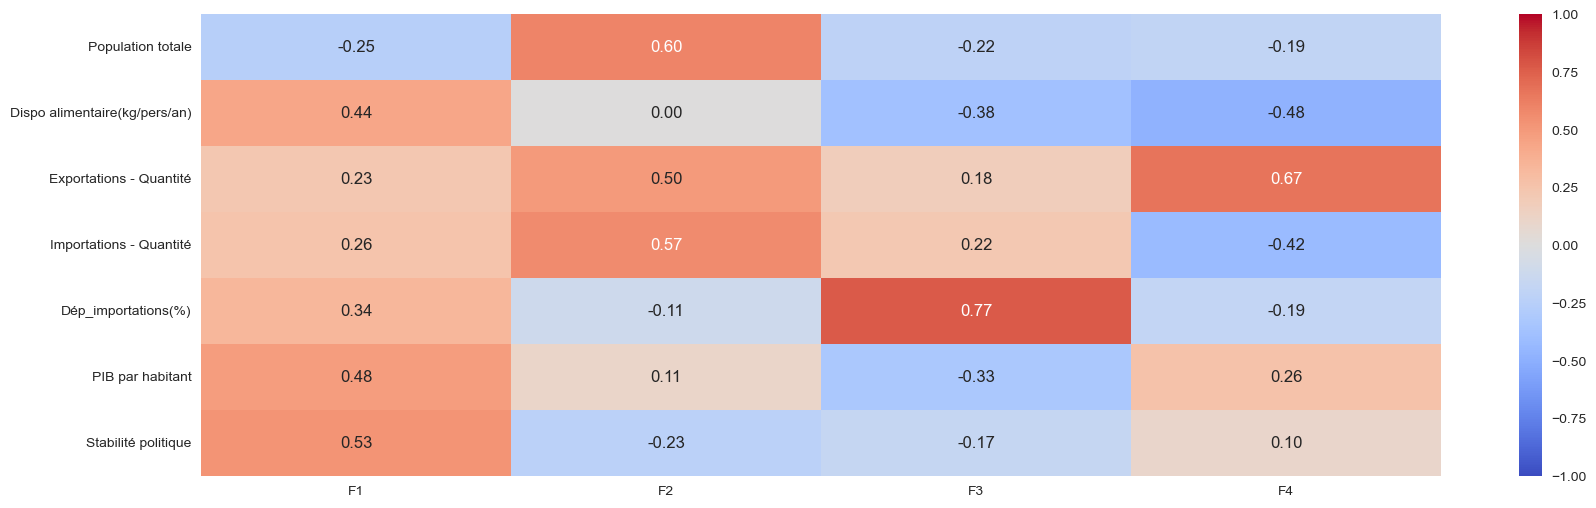

In [265]:
# Représentation graphique
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.savefig('pcsT.png', dpi=300, bbox_inches='tight')

**Interprétation**
* La population totale est positivement corrélée à F2
* La disponibilité alimentaire est positivement corrélée à F1 et négativement corrélée à F4
* Les exportations sont positivement corrélées à F2 et F4
* Les importations sont positivement corrélées à F2 et négativement corrélées à F4.
* Le taux de dépendance aux importations est positivement légèrement corrélé à F1 et fortement correlé à F3
* Le PIB est positivement corrélé à F1 et négativement corrélé à F3.
* La stabilité politique est positivemùent corrélée à F1. 

## <font color='purple'>Cercle des corrélations <a class="anchor" id="section_2_3"></a>

In [266]:
# Définition d'une fonction pour l'élaboration des cercle de corrélation.
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.savefig('corcercle.png', dpi=300, bbox_inches='tight')
    plt.show(block=False)

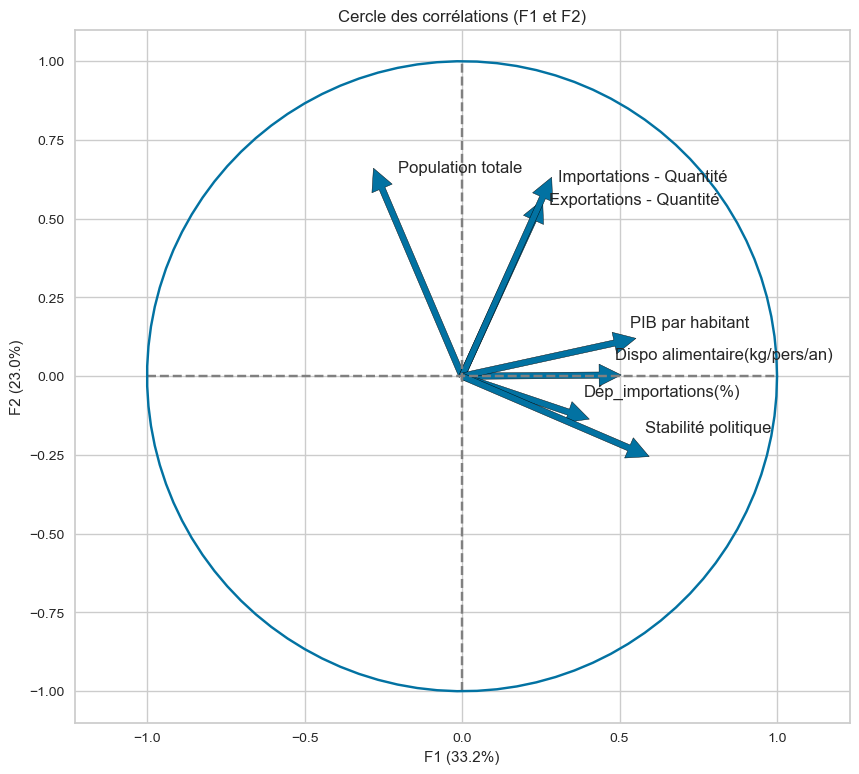

In [267]:
# Cercle de corrélation pour les deux premières composantes
x_y = (0,1)
correlation_graph(pca, x_y, features)

Nous constatons que les deux premières composantes principales, F1 et F2, captent respectivement 33.2% et 23,0% de la variance totale, ce qui signifie que le premier plan factoriel représente 56.2% de l'inertie totale.

La composante F1 nous permet de classer les pays en fonction de leur consommation de volailles,leur richesse(pouvoir d'achat,PIB),leur stabilité politique et leur dépendance aux importations de volailles qui toutefois n'est paas bien représentée tandis que la composante F2 est liée aux importations, exportations et production de volailles et à la population du pays.\
Nous observons aussi que les importations sont très corrélées aux exportations ainsi que la disponibilité alimentaire au PIB.


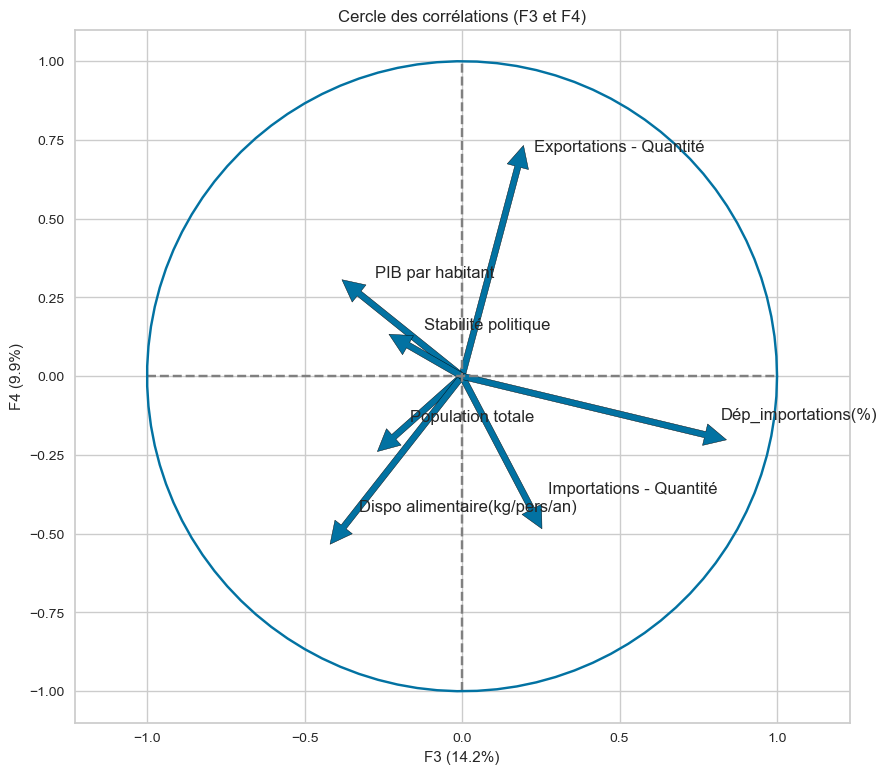

In [268]:
# Cercle de corrélation pour F3 et F4
correlation_graph(pca, (2,3), features)

Le deuxième plan factoriel ne capture que 24.2% de la variance totale, ce qui signifie qu'il contient moins d'informations, notamment sur les importations.\
Toutefois, les exportations sont fortement corrélées à F4 et la dépendance aux importation de volailles à F3.

## <font color='purple'>Projection des individus <a class="anchor" id="section_2_4"></a>

In [269]:
# Calcul des coordonnées de nos individus dans le nouvel espace
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-2.6284741 ,  0.43875726,  1.07607023, -0.08328305],
       [ 0.44043612,  1.93939629, -0.18531846, -1.61427741],
       [ 0.18089216, -0.86902425,  0.68837981, -0.10079969],
       [-1.69536287,  0.09468014, -0.27334707,  0.24792602],
       [ 2.81203266,  5.23435342,  0.71165123,  1.16029745]])

In [270]:
# Définition d'une fonction pour la projection des individus.
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.savefig('pojectindiv.png', dpi=300, bbox_inches='tight')
    plt.show()

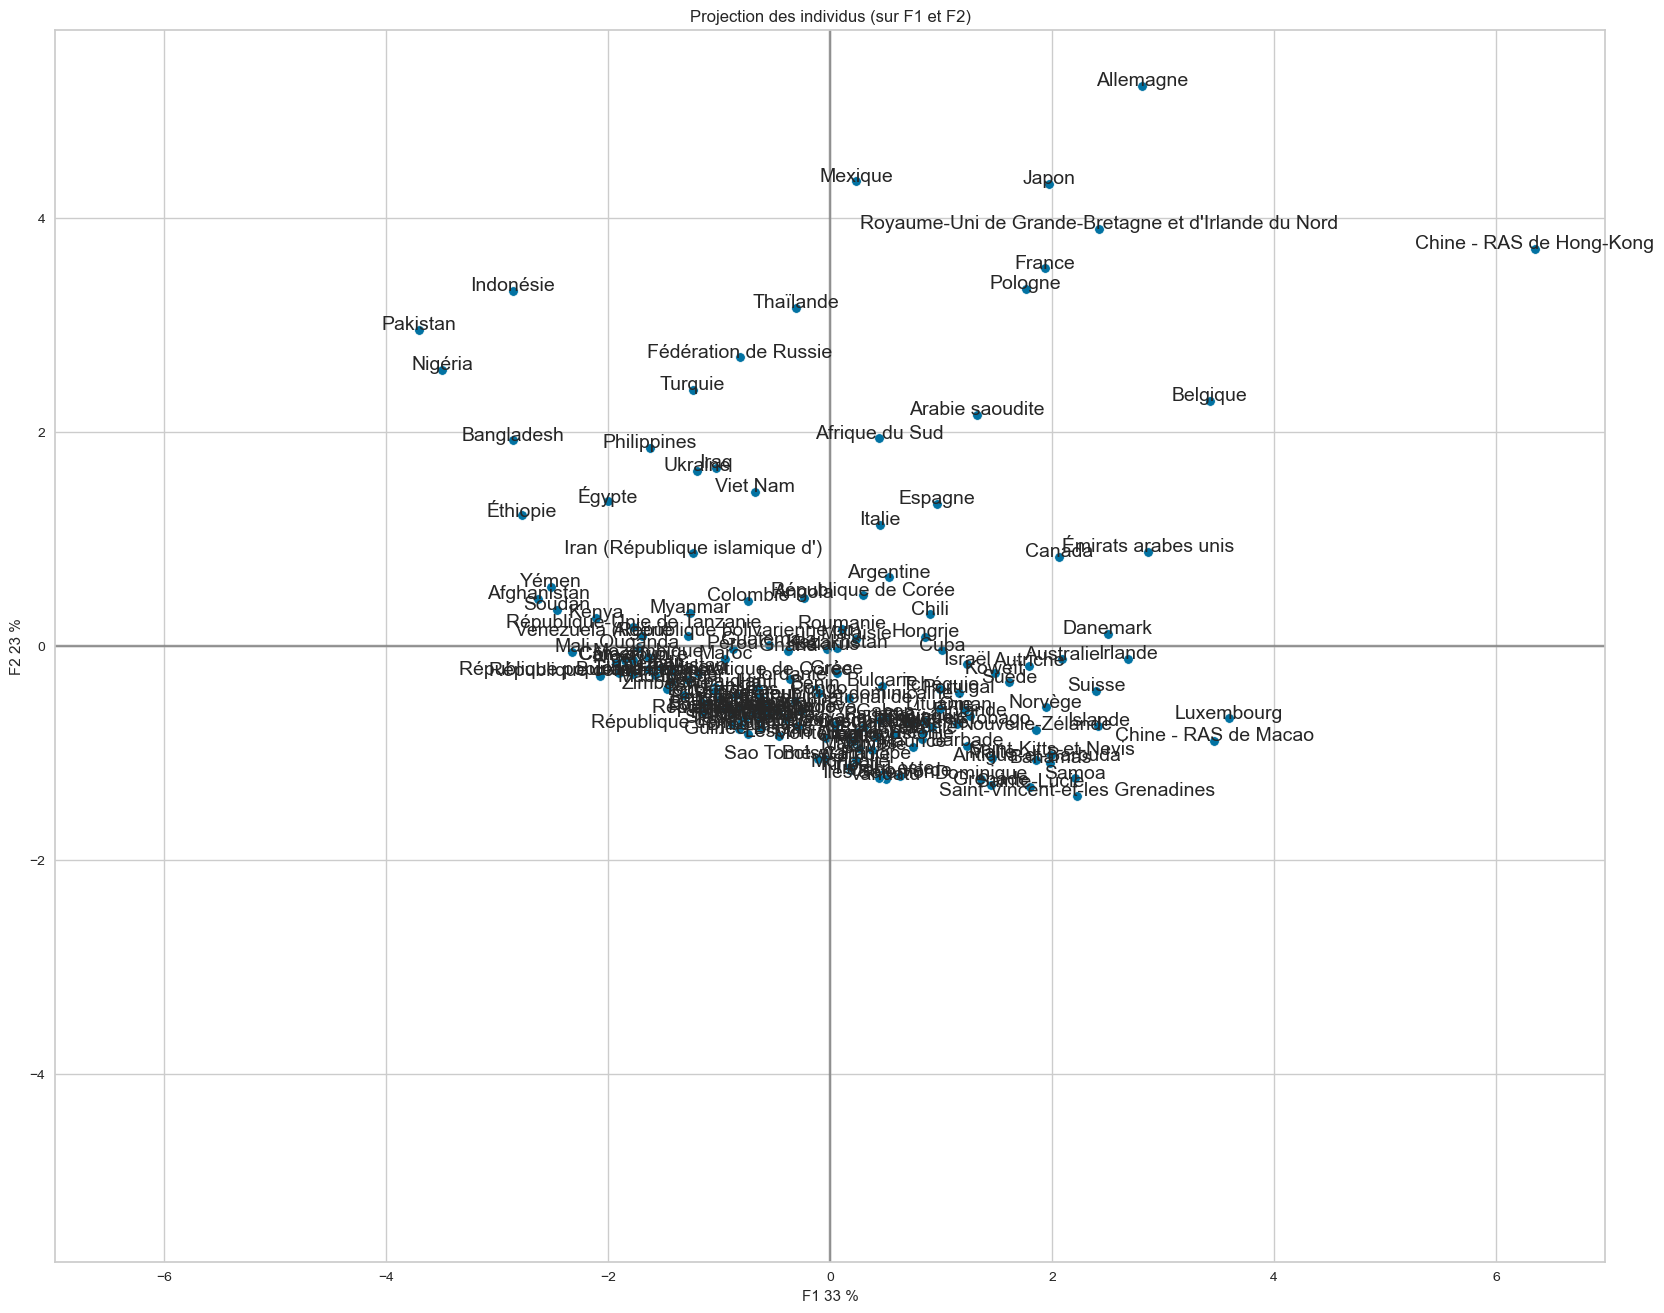

In [271]:
# Projection des individus sur le premier plan factoriel
x_y = [0,1]
display_factorial_planes(X_proj, x_y,pca, labels=names, figsize=(20,16))

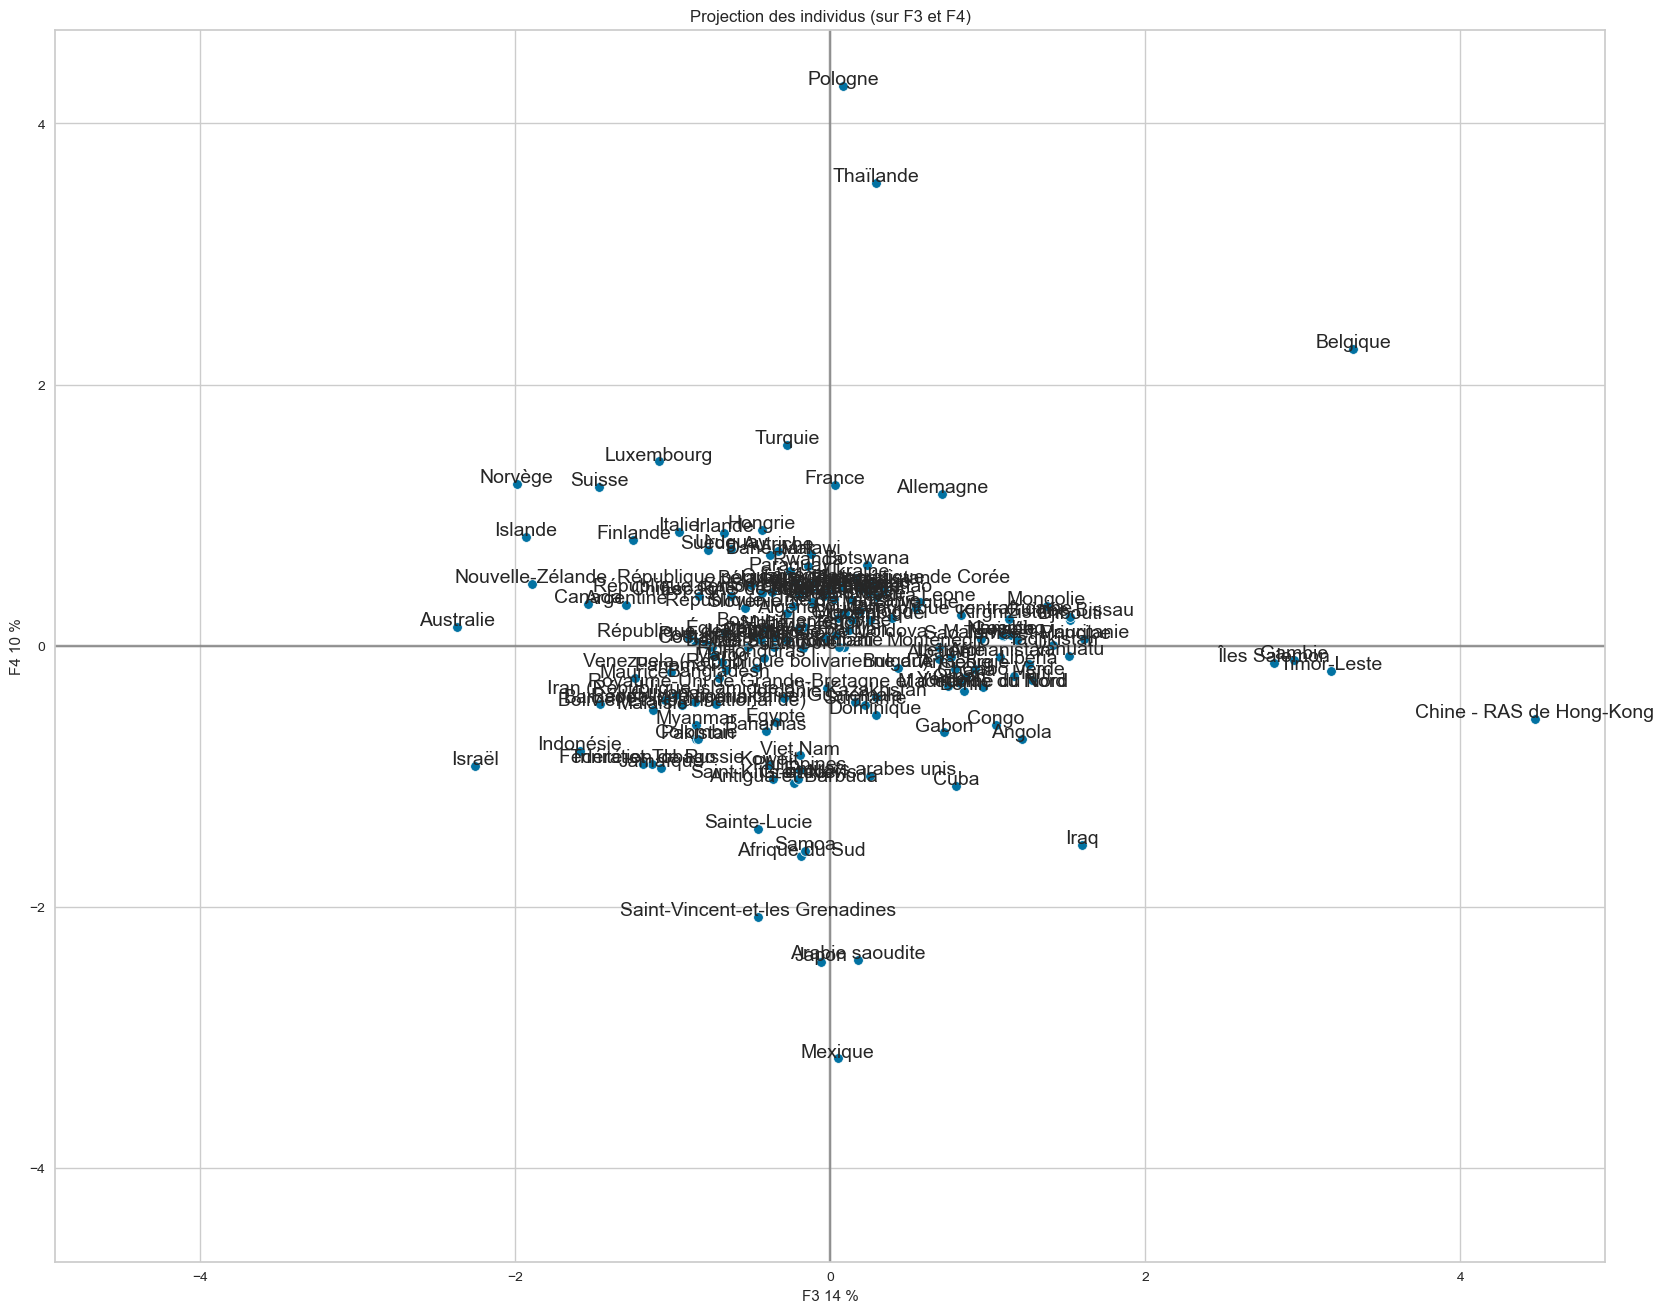

In [272]:
#Projection des individus sur le deuxième plan factoriel
x_y = [2,3]
display_factorial_planes(X_proj, x_y,pca, labels=names, figsize=(20,16))

## Classification Ascendante Hiérarchique

In [273]:
# Clustering hiérarchique:calcul de la matrice de similarité/disimilarité avec la méthode de Ward
linkage_matrix = linkage(X_scaled, method="ward", metric='euclidean')
linkage_matrix[:5]


array([[1.05000000e+02, 1.24000000e+02, 1.37492262e-01, 2.00000000e+00],
       [2.60000000e+01, 1.57000000e+02, 1.59809309e-01, 2.00000000e+00],
       [1.01000000e+02, 1.42000000e+02, 1.70824074e-01, 2.00000000e+00],
       [1.90000000e+01, 1.21000000e+02, 1.85175799e-01, 2.00000000e+00],
       [8.50000000e+01, 1.08000000e+02, 1.99723508e-01, 2.00000000e+00]])

## <font color='purple'>Construction et analyse du dendrogramme <a class="anchor" id="section_3_1"></a>

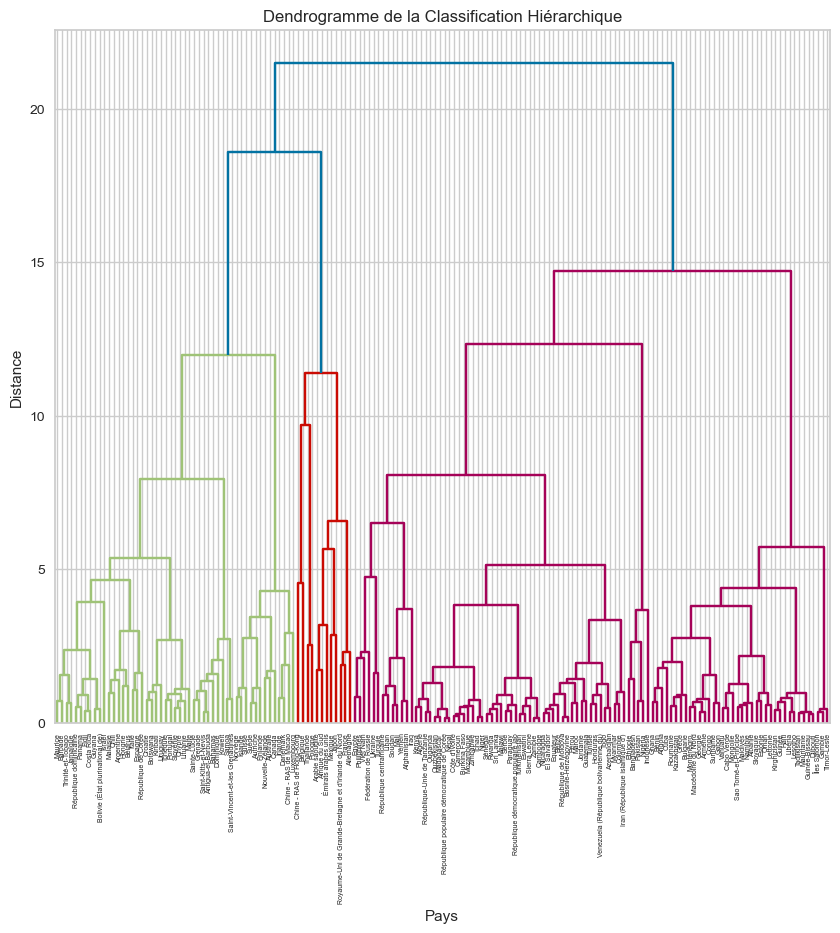

In [274]:
# Construction du dendogramme
plt.figure(figsize=(10, 9))
dendrogram(linkage_matrix, labels=df_poulet.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogramme de la Classification Hiérarchique")
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.savefig('dendrogram.png', dpi=300, bbox_inches='tight', transparent=True) 
plt.show()

L'analyse du dendrogramme révèle un saut significatif aux alentours de 12.

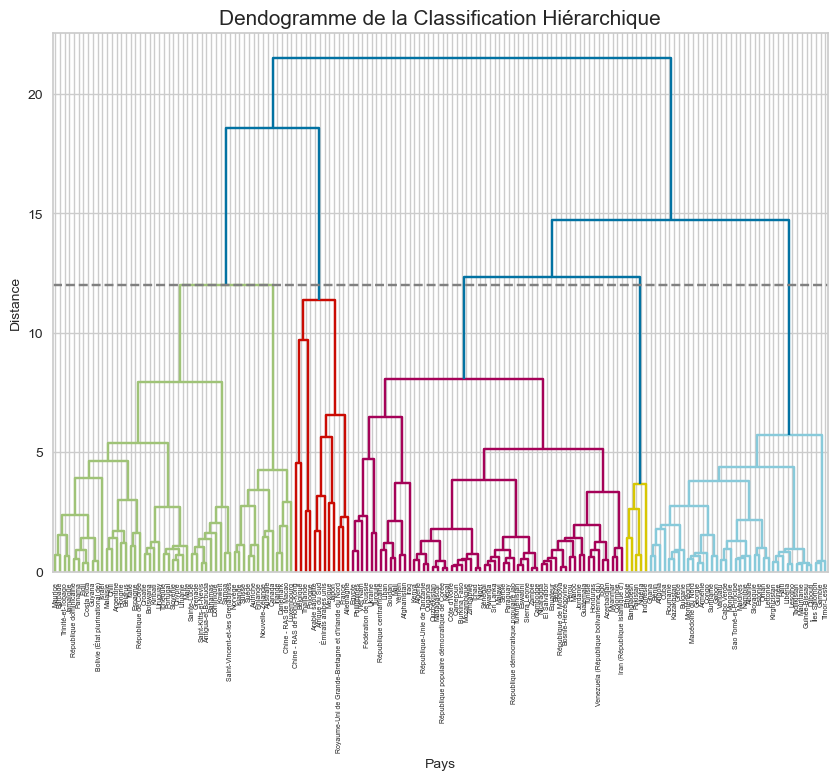

In [275]:
# Génération du dendrogramme avec la droite déterminant les clusters
plt.figure(figsize=(10, 7))
fig.set_dpi(300)
dendrogram(linkage_matrix, labels=df_poulet.index, orientation='top', distance_sort='descending', show_leaf_counts=True,color_threshold=12)
plt.axhline(y=12,color='grey',linestyle='--')
plt.title("Dendogramme de la Classification Hiérarchique",fontsize=15)
plt.xlabel("Pays",fontsize=10)
plt.ylabel("Distance",fontsize=10)
plt.savefig('dendrogramme.png', dpi=300, bbox_inches='tight', transparent=True) 
plt.show()


Sur notre dendogramme, nous pouvons observé la formation de 5 groupes. Cela suggère qu'à un seuil de distance autour de 12, il y a cinq clusters principaux qui pourraient être considérés comme satisfaisants pour l'analyse.

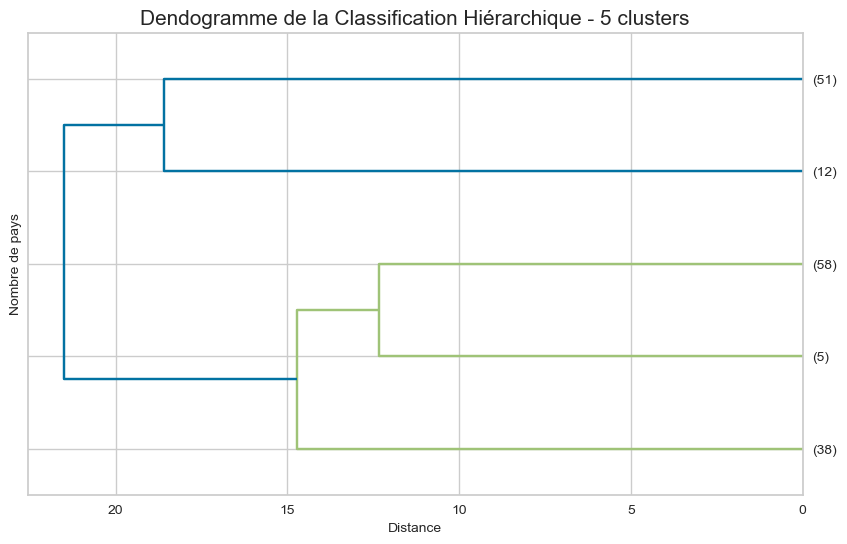

In [276]:
# Coupage du dendrogramme en 5 groupes pour pour mieux observer le partitionnement.
#les arguments p=5, truncate_mode="lastp" signifient que l'on ne va afficher que 5 clusters
fig = plt.figure(figsize=(10,6))
plt.title('Dendogramme de la Classification Hiérarchique - 5 clusters', fontsize=15)
plt.xlabel('Distance', fontsize=10)
plt.ylabel('Nombre de pays',fontsize=10)
dendrogram(linkage_matrix, labels = names, p=5, truncate_mode='lastp', leaf_font_size=10, orientation='left')
plt.savefig('dendrogramZone.png', dpi=300, bbox_inches='tight')
plt.show()

Ainsi, nous identifions cinq groupes distincts de pays, parmi lesquels un groupe est composé uniquement de cinq pays. Nous observerons ces différents clusters.

## <font color='purple'>Analyse des centroïdes des clusters <a class="anchor" id="section_3_2"></a>

In [277]:
# Nombre de clusters souhaités
num_clusters= 5
# Assignation des pays aux clusters avec la fonction fclusters
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
clusters

array([3, 4, 1, 3, 4, 1, 5, 4, 5, 1, 5, 5, 3, 5, 2, 5, 4, 3, 5, 3, 5, 1,
       3, 5, 1, 1, 3, 3, 5, 5, 4, 5, 5, 3, 1, 5, 5, 1, 3, 5, 1, 5, 3, 5,
       1, 3, 5, 5, 4, 3, 1, 1, 1, 5, 1, 3, 1, 1, 5, 1, 1, 3, 5, 2, 3, 3,
       5, 5, 5, 5, 5, 4, 3, 1, 3, 1, 5, 5, 1, 1, 3, 1, 5, 5, 1, 3, 5, 3,
       1, 3, 5, 3, 5, 1, 4, 1, 1, 3, 3, 1, 3, 3, 2, 5, 5, 3, 1, 3, 3, 2,
       5, 3, 3, 4, 5, 3, 1, 4, 3, 3, 5, 3, 5, 3, 3, 3, 5, 5, 5, 5, 1, 3,
       3, 1, 5, 3, 3, 5, 1, 5, 3, 1, 3, 5, 4, 1, 3, 5, 3, 3, 3, 3, 5, 1,
       3, 3, 3, 3, 3, 3, 4, 3, 2, 1], dtype=int32)

In [278]:
# Ajout des informations de cluster dans df_poulet
df_poulet['Cluster_cah'] = clusters
df_poulet

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique,Cluster_cah
Zone,,,,,,,,
Afghanistan,36296113,1.53,-1.53,29.0,50.877193,530.149831,-2.80,3
Afrique du Sud,57009756,35.69,63.00,514.0,24.268178,6723.928582,-0.28,4
Albanie,2884169,16.36,0.00,38.0,80.851064,4521.752219,0.38,1
Algérie,41389189,6.38,0.00,2.0,0.722022,4134.936054,-0.92,3
Allemagne,82658409,19.47,646.00,842.0,48.418631,44670.222288,0.59,4
...,...,...,...,...,...,...,...,...
Égypte,96442591,12.96,1.00,110.0,8.800000,1917.049576,-1.42,3
Émirats arabes unis,9487203,43.47,94.00,433.0,105.097087,42522.377622,0.62,4
Équateur,16785361,19.31,0.00,0.0,0.000000,6246.404252,-0.07,3


In [279]:
# Affichage du nombre de pays par clusters
tableau_contingence = pd.crosstab(index=df_poulet['Cluster_cah'], columns='Nombre de Pays')
tableau_contingence

col_0,Nombre de Pays
Cluster_cah,
1,38
2,5
3,58
4,12
5,51


In [280]:
# Analyse des caractéristiques moyens de chaque clusters
cluster_averages = df_poulet.groupby('Cluster_cah').mean()
cluster_averages

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique
Cluster_cah,,,,,,,
1,6.148439e+06,13.206053,5.822368,62.578947,97.441794,5709.674968,0.020526
2,1.859032e+08,3.138000,0.474000,0.800000,1.468382,1967.092599,-1.570000
3,2.936958e+07,10.885862,16.214483,37.465517,12.423223,3141.569823,-0.765517
4,5.766630e+07,29.771667,402.666667,594.916667,76.143412,29453.817009,0.191667
5,9.339758e+06,33.581765,33.100980,42.254902,40.652728,28339.350793,0.734902


**Interprétation**
* Le cluster 1 est caractérisé par des nations à revenu intermédiaire selon le classement de Banque Mondiale et du FMI(Fonds Monétaire International).Ces pays sont généralement légèrement stables, possédant la plus faible population mais ayant une disponibilité alimentaire limitée, un taux d'exportation bas, et une forte dépendance à l'égard des importations.


* Le cluster 2 se distingue par des pays qui sont parmi les plus pauvres et les plus instables, avec toutefois la plus grande population. Ces pays présentent un commerce de viande de volaille presque inexistant, tant à l'importation qu'à l'exportation, avec un taux de dépendance aux importations négligeable et une disponibilité alimentaire extrêmement limitée.


* Le cluster 3 est composé de pays classés par le FMI comme ayant des revenus intermédiaires inférieurs. Ces nations tendent à être relativement instables et abritent une population conséquente.Leur disponibilité alimentaire est restreinte, avec un faible taux d'exportations et un niveau de dépendance aux importations peu avantageux.


* Le cluster 4 est défini par des pays possédant des revenus les plus élevés(nations riches). Ces pays sont généralement stables et affichent une consommation notable de viande de volaille. Ils se caractérisent par un volume d'exportations substantiel, bien que celui-ci soit inférieur à leurs importations plus significatives. La population de ces nations est appréciable, et ils présentent le taux de dépendance aux exportations le plus élevé parmi les clusters.


* Le cluster 5 se distingue par la deuxième plus petite population et les plus stables parmi les clusters, accompagnée de revenus élevés. Cette catégorie est marquée par une consommation élevée de viande de volaille, la plus importante de tous les clusters. Bien que ses niveaux d'exportation et d'importation soient les deuxièmes meilleurs, ils restent modestes en comparaison avec ceux du quatrième cluster. Le taux de dépendance à l'importation de ce cluster est proche de la moyenne. 

In [281]:
# Aperçu des pays dans le cluster 1
cluster_1=df_poulet.loc[df_poulet['Cluster_cah']==1]
cluster_1.head(60)

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique,Cluster_cah
Zone,,,,,,,,
Albanie,2884169,16.36,0.00,38.0,80.851064,4521.752219,0.38,1
Angola,29816766,10.56,0.00,277.0,86.833856,4042.681402,-0.38,1
Arménie,2944791,16.06,0.00,35.0,74.468085,4041.995071,-0.62,1
Bulgarie,7102444,22.06,45.00,108.0,68.789809,8242.455771,0.33,1
Bénin,11175198,14.40,0.00,123.0,76.397516,1095.274459,0.03,1
Cabo Verde,537498,17.62,-10.62,12.0,120.000000,3132.620589,0.77,1
Congo,5110695,21.53,0.00,104.0,94.545455,2088.500216,-0.53,1
Cuba,11339254,23.72,-25.72,312.0,91.228070,8543.360968,0.65,1
Djibouti,944099,2.68,0.00,3.0,100.000000,2659.854160,-0.74,1


Ce sont des nations qui présentent une forte dépendance envers les importations, avec des exportations pratiquement absentes et une population réduite. 

In [282]:
# Aperçu des pays dans le cluster 2
cluster_2=df_poulet.loc[df_poulet['Cluster_cah']==2]
cluster_2.head(60)

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique,Cluster_cah
Zone,,,,,,,,
Bangladesh,159685424,1.50,-2.50,0.0,0.000000,1785.962903,-1.26,2
Indonésie,264650963,7.19,0.00,1.0,0.043048,3839.785074,-0.50,2
Nigéria,190873244,1.01,0.00,0.0,0.000000,1941.873933,-2.00,2
Pakistan,207906209,5.86,4.00,2.0,0.156006,1558.080077,-2.41,2
Éthiopie,106399924,0.13,0.87,1.0,7.142857,709.761008,-1.68,2


Il s'agit de pays dotés d'une population importante mais confrontés à une forte instabilité politique et à la pauvreté, et où les exportations, importations, et la dépendance aux importations sont très négligeables. 

In [283]:
# Aperçu des pays dans le cluster 3
cluster_3=df_poulet.loc[df_poulet['Cluster_cah']==3]
cluster_3.head(60)

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique,Cluster_cah
Zone,,,,,,,,
Afghanistan,36296113,1.53,-1.53,29.0,50.877193,530.149831,-2.80,3
Algérie,41389189,6.38,0.00,2.0,0.722022,4134.936054,-0.92,3
Azerbaïdjan,9845320,13.11,0.00,27.0,20.930233,4057.624007,-0.75,3
Belize,375769,25.69,0.00,0.0,0.000000,6101.585949,0.04,3
Bosnie-Herzégovine,3351525,16.70,8.00,10.0,18.181818,5255.950279,-0.35,3
Burkina Faso,19193234,2.27,-2.27,0.0,0.000000,711.184631,-0.93,3
Cambodge,16009409,2.34,-2.34,10.0,26.315789,1400.899268,0.09,3
Cameroun,24566073,3.16,0.00,0.0,0.000000,1479.862223,-1.10,3
Colombie,48909839,31.99,2.00,78.0,4.747413,6450.319585,-0.77,3


Ces pays sont peu prospères et politiquement instables, caractérisés par des exportations insignifiantes et des importations limitées.

In [284]:
# Aperçu des pays dans le cluster 4
cluster_4=df_poulet.loc[df_poulet['Cluster_cah']==4]
cluster_4.head(20)

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique,Cluster_cah
Zone,,,,,,,,
Afrique du Sud,57009756,35.69,63.0,514.0,24.268178,6723.928582,-0.28,4
Allemagne,82658409,19.47,646.0,842.0,48.418631,44670.222288,0.59,4
Arabie saoudite,33101178,43.36,10.0,722.0,50.313589,20138.146332,-0.64,4
Belgique,11419748,12.65,656.0,338.0,222.368421,44162.256259,0.43,4
Chine - RAS de Hong-Kong,7306322,53.51,663.0,907.0,323.928571,45737.483212,0.83,4
France,64842509,22.90,501.0,506.0,32.167832,40458.149875,0.28,4
Japon,127502725,18.50,10.0,1069.0,44.265010,38928.952602,1.11,4
Mexique,124777324,32.52,9.0,972.0,23.038635,9434.378177,-0.80,4
Pologne,37953180,30.30,1025.0,55.0,4.757785,13615.440436,0.52,4


Ces pays, caractérisés par une population conséquente et un état de prospérité et de stabilité, se distinguent par des importations et une dépendance aux importations, tout en ayant également des exportations.

In [285]:
# Aperçu des pays dans le cluster 5
cluster_5=df_poulet.loc[df_poulet['Cluster_cah']==5]
cluster_5.head(20)

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique,Cluster_cah
Zone,,,,,,,,
Antigua-et-Barbuda,95426,54.10,0.00,7.0,100.000000,16110.556284,0.75,5
Argentine,43937140,42.24,207.00,8.0,0.407747,14609.783370,0.17,5
Australie,24584620,47.65,42.00,16.0,1.366354,57430.803787,0.90,5
Autriche,8819901,18.20,78.00,110.0,63.583815,47429.535836,1.05,5
Bahamas,381755,43.17,-35.17,24.0,92.307692,30969.876197,0.99,5
Barbade,286232,46.78,0.00,2.0,11.764706,17843.196496,0.97,5
Bolivie (État plurinational de),11192855,36.00,1.00,1.0,0.233100,3280.011790,-0.28,5
Botswana,2205080,3.39,0.00,3.0,42.857143,6705.339802,1.02,5
Bélarus,9450231,27.98,152.00,21.0,7.924528,5637.218565,-0.05,5


Il s'agit de nations prospères et très stables, avec une forte consommation de volailles, mais une population relativement faible, et où les importations et exportations sont généralement insignifiantes.

## <font color='purple'>Heatmap de clusters <a class="anchor" id="section_4_4"></a>

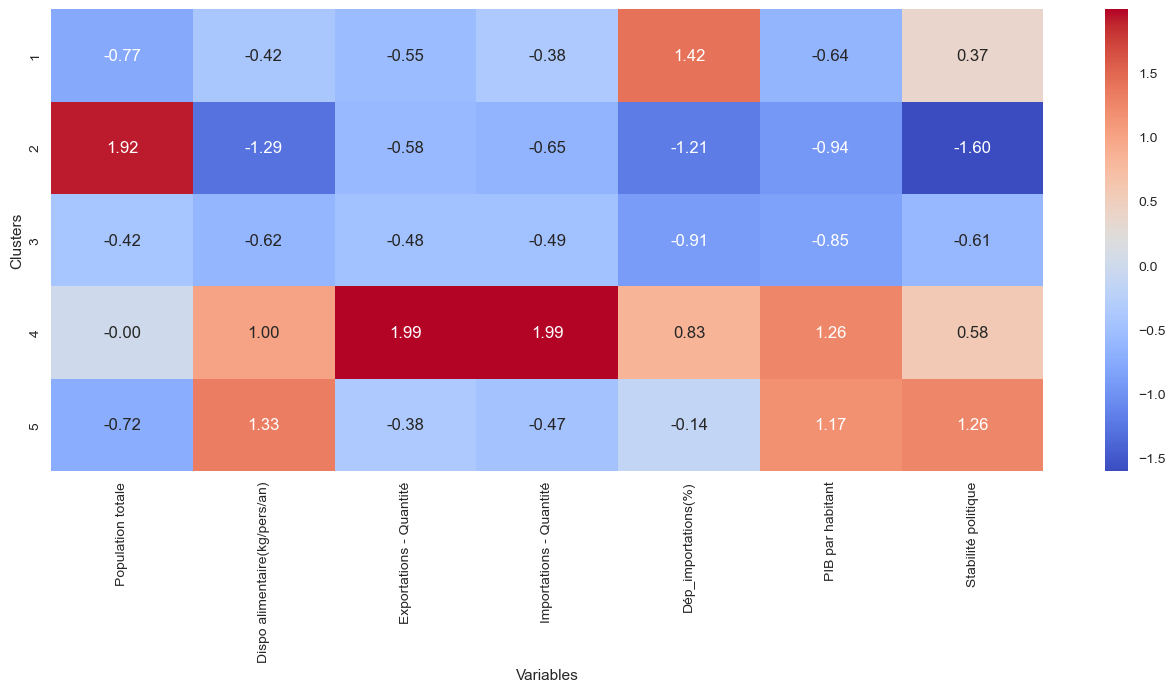

In [286]:
data_heatmap = df_poulet.groupby(df_poulet['Cluster_cah']).mean()
data_heatmap=data_heatmap[['Population totale','Dispo alimentaire(kg/pers/an)','Exportations - Quantité','Importations - Quantité','Dép_importations(%)','PIB par habitant','Stabilité politique']]

X2 = data_heatmap.values
names2= data_heatmap.index
features2= data_heatmap.columns

# Centrage et Réduction
std_scale2 = preprocessing.StandardScaler().fit(X2)
X_scaled2 = std_scale2.transform(X2)
X_scaled2 = pd.DataFrame(X_scaled2)
X_scaled2.columns = list(features2)

# Définition des labels pour les clusters 
clusterslabel = ['1', '2', '3', '4','5']

# Création du heatmap
plt.figure(figsize=(16, 6))
p = sns.heatmap(X_scaled2, cmap='coolwarm', annot=True, yticklabels=clusterslabel, fmt=".2f")
p.set(xlabel="Variables", ylabel='Clusters')
plt.savefig('heatmapcah.png', dpi=300, bbox_inches='tight')
plt.show()


Le cluster 4 se distingue par les meilleures valeurs en matière d'importation, de taux de dépendance aux importations de volailles et de produit intérieur brut (PIB), et bénéficie également d'un indice favorable de stabilité politique.

## <font color='purple'>Boxplot de clustering<a class="anchor" id="section_4_5"></a>

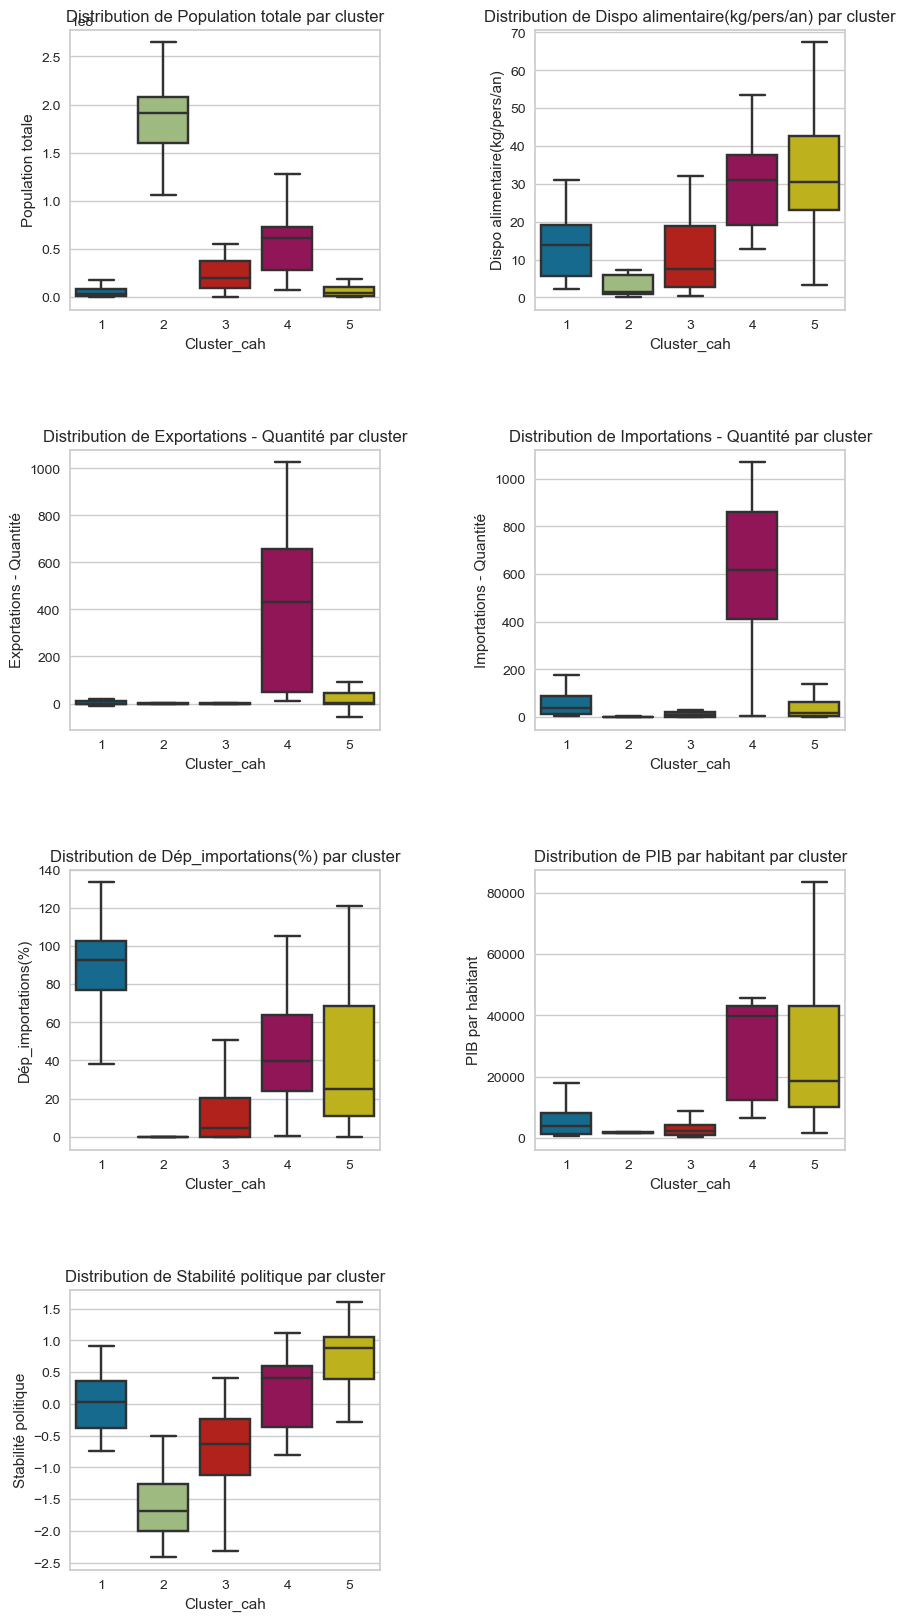

In [287]:
n = len(features)  # Le nombre total de caractéristiques à tracer

# Calculer le nombre de lignes nécessaires en supposant 2 colonnes
num_rows = (n + 1) // 2  # Utilisation de la division entière pour gérer les nombres impairs

# Créer une figure avec un nombre approprié de sous-graphiques
fig, ax = plt.subplots(num_rows, 2, figsize=(10, num_rows * 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Tracer les boxplots dans une grille de sous-graphiques
for i in range(n):
    row = i // 2  # Calculer l'index de la ligne
    col = i % 2   # Calculer l'index de la colonne
    sns.boxplot(data=df_poulet, x='Cluster_cah', y=features[i], ax=ax[row, col],showfliers = False,)
    ax[row, col].set_title(f"Distribution de {features[i]} par cluster")

# S'il y a un nombre impair de caractéristiques, supprimer le dernier sous-graphique inutilisé
if n % 2:
    fig.delaxes(ax[num_rows-1, 1])
    plt.savefig('boxplotcah.png', dpi=300, bbox_inches='tight')

**Interprétation heatmap et boxplot**
* Population totale: cluster 2 et **cluster 4**
* Dispo alimentaire(kg/pers/an): cluster 5 et **cluster 4**
* Exportations-Quantité: **cluster 4**
* Importations-Quantité: **cluster 4**
* Dép_imporations(%): cluster 1 et **cluster 4**
* PIB par habitant: **cluster 4** et 5
* Stabilité politique : cluster 5 et **cluster 4**


Le cluster 4 se distingue comme le plus pertinent, principalement en raison de son taux élevé d'importation de volailles, accompagné d'un produit intérieur brut (PIB) robuste et d'une stabilité politique avérée.

## <font color='purple'>Affichage des pays cibles <a class="anchor" id="section_4_6"></a>

In [288]:
# Extraction et affichage des pays cibles
cluster_cible = df_poulet.loc[df_poulet['Cluster_cah'] ==4]
pays_cibles = cluster_cible.index.get_level_values(0).tolist()
print("Pays à cibler issue du cluster 4 pour la méthode du CAH sont : ")
print()
for item in pays_cibles :
    print(item)

Pays à cibler issue du cluster 4 pour la méthode du CAH sont : 

Afrique du Sud
Allemagne
Arabie saoudite
Belgique
Chine - RAS de Hong-Kong
France
Japon
Mexique
Pologne
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
Thaïlande
Émirats arabes unis


# <font color='blue'>Clustering avec l'algorithme K-means <a class="anchor" id="chapter4"></a>

## <font color='purple'>Détermination du nombre de clusters optimal<a class="anchor" id="section_4_1"></a>

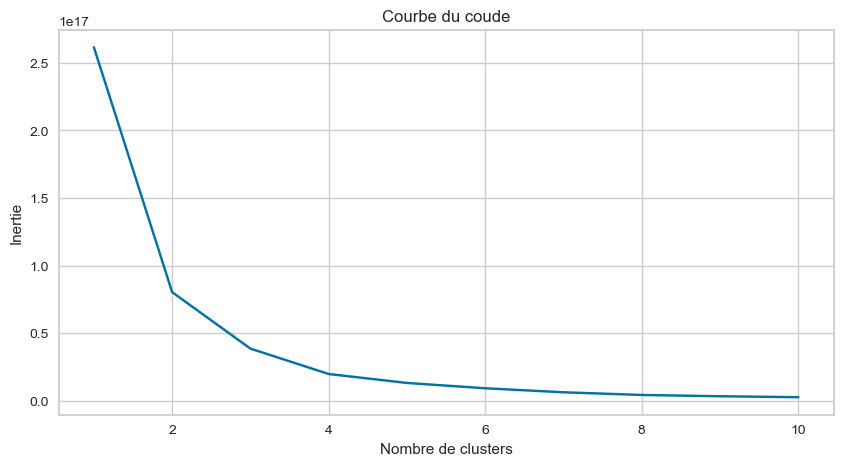

In [289]:
# Méthode du coude
# Création d'une liste vide pour enregistrer les inerties :  
inertia = []

# Calcul de l'inertie pour différents nombres de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Affichage du graphique pour la méthode du coude
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, linestyle='-', color='b')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Courbe du coude')
plt.grid(True)
plt.savefig('coude.png', dpi=300, bbox_inches='tight')
plt.show()

L'analyse de la méthode du coude révèle des points d'inflexion à 2, 3 et 4 clusters, suggérant ces nombres comme potentiels optimaux. Pourtant, dans le contexte de notre étude, privilégier 4 clusters semble être le choix le plus judicieux pour obtenir des groupes plus homogènes, comparé à 2 ou 3 clusters. Toutefois, le score de silhouette sera utilisé pour confirmer le nombre de clusters le plus approprié.

Le score de silhouette pour 2 clusters est : 0.2792532325285444
Le score de silhouette pour 3 clusters est : 0.2593852476238225
Le score de silhouette pour 4 clusters est : 0.2822761274152942
Le score de silhouette pour 5 clusters est : 0.24140692791171564
Le score de silhouette pour 6 clusters est : 0.26954229178432143
Le score de silhouette pour 7 clusters est : 0.2782083518179942


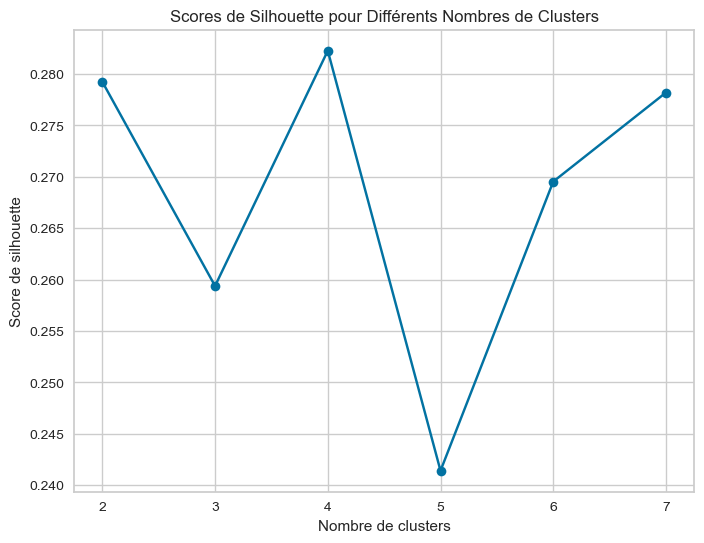

In [290]:
# Méthode du score de silhouette
# Définir une plage de valeurs pour le nombre de clusters
range_n_clusters = [2, 3, 4, 5, 6, 7]# D'après la méthode du coudenous pouvons nous limiter à 6 clusters.

# Initialiser une liste pour stocker les scores de silhouette pour chaque nombre de clusters
silhouette_scores = []

# Boucle pour calculer le score de silhouette pour chaque nombre de clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_

    # Calcul du score de silhouette
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print("Le score de silhouette pour", n_clusters, "clusters est :", silhouette_avg)

# Affichage silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Scores de Silhouette pour Différents Nombres de Clusters')
plt.grid(True)
plt.savefig('silhouettescore.png', dpi=300, bbox_inches='tight')
plt.show()

Il est évident que, pour notre analyse, le nombre optimal de clusters est de 4.

## <font color='purple'>Visualisation des clusters K-means via ACP <a class="anchor" id="section_4_2"></a>

In [291]:
# Application de K-means avec 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajout des clusters K-means dans le dataframe principal
df_poulet['Cluster_kms'] = clusters

# Afficher les résultats
df_poulet

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique,Cluster_cah,Cluster_kms
Zone,,,,,,,,,
Afghanistan,36296113,1.53,-1.53,29.0,50.877193,530.149831,-2.80,3,0
Afrique du Sud,57009756,35.69,63.00,514.0,24.268178,6723.928582,-0.28,4,2
Albanie,2884169,16.36,0.00,38.0,80.851064,4521.752219,0.38,1,0
Algérie,41389189,6.38,0.00,2.0,0.722022,4134.936054,-0.92,3,0
Allemagne,82658409,19.47,646.00,842.0,48.418631,44670.222288,0.59,4,3
...,...,...,...,...,...,...,...,...,...
Égypte,96442591,12.96,1.00,110.0,8.800000,1917.049576,-1.42,3,2
Émirats arabes unis,9487203,43.47,94.00,433.0,105.097087,42522.377622,0.62,4,1
Équateur,16785361,19.31,0.00,0.0,0.000000,6246.404252,-0.07,3,0


In [292]:
# Nombre de clusters souhaités
n_clust =4

# Clustering par K-means
km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(X_scaled)
df_poulet['Cluster_kms'] = km.labels_
X_projected = pca.transform(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
colors = [0, 1, 2, 3]

# Graphique avec les deux premières composantes principales
fig = px.scatter(
    pca.fit_transform(X_scaled), x=0, y=1, color=df_poulet['Cluster_kms'].astype(str),
    template="seaborn",
    hover_name=df_poulet.index.get_level_values(0),
   
    labels={'0': 'PC 1', '1': 'PC 2'},
    category_orders={"color": ["0", "1", "2", "3"]},
    title="Visualisation des Clusters K-means via ACP")
fig.add_scatter(name="centroïds", x=centroids_projected[:,0], y=centroids_projected[:,1], mode="markers", marker=dict(color='black', symbol='x',size=8), text=colors )
fig.write_image('projectionkmeans.png', scale=3)
fig.show()

## <font color='purple'>Analyse des centroïdes des clusters <a class="anchor" id="section_4_3"></a>

In [293]:
# Analyse des caractéristiques moyens de chaque clusters
clusterkms_averages = df_poulet.groupby('Cluster_kms').mean()
clusterkms_averages

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique,Cluster_cah
Cluster_kms,,,,,,,,
0,9.131392e+06,33.820377,31.913396,58.886792,48.306027,29112.130305,0.743208,4.528302
1,1.588880e+07,11.010000,7.338111,38.044444,44.565789,3464.701014,-0.432667,2.400000
2,1.438452e+08,12.166000,59.437000,59.800000,3.792269,4207.743218,-1.382000,2.500000
3,6.204622e+07,28.526364,430.727273,609.636364,73.511260,28265.766044,0.152727,4.000000


**Interprétation**
* Le Cluster 0 regroupe des pays ayant la population la plus réduite, la plus grande disponibilité alimentaire, des exportations et importations minimes et une dépendance modérée aux importations. Ces pays sont les plus riches et le plus stables.


* Cluster 1 inclut des nations peu peuplées, ayant la plus faible disponibilité alimentaire, des importations et exportations très limitées, une dépendance moyenne aux importations, et tendent à être plutôt instables. Leur PIB est généralement bas.


* Le Cluster 2 regroupe des pays ayant la population la plus élevée, une faible disponibilité alimentaire, des importations et exportations équivalentes mais minimes, la plus faible dépendance aux importations, un PIB bas, et sont les plus instables.


* Le Cluster 3 regroupe des pays ayant la deuxième plus grande population, une bonne disponibilité alimentaire, les plus fortes exportations et importations, ces dernières étant supérieures aux exportations, et présentent le meilleur taux de dépendance aux importations. Ces nations sont riches et stables.
 


In [294]:
# Aperçu des pays dans le cluster 0
clusterkms_0=df_poulet.loc[df_poulet['Cluster_kms']==0]
clusterkms_0.head(20)

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique,Cluster_cah,Cluster_kms
Zone,,,,,,,,,
Antigua-et-Barbuda,95426,54.10,0.00,7.0,100.000000,16110.556284,0.75,5,0
Argentine,43937140,42.24,207.00,8.0,0.407747,14609.783370,0.17,5,0
Australie,24584620,47.65,42.00,16.0,1.366354,57430.803787,0.90,5,0
Autriche,8819901,18.20,78.00,110.0,63.583815,47429.535836,1.05,5,0
Bahamas,381755,43.17,-35.17,24.0,92.307692,30969.876197,0.99,5,0
Barbade,286232,46.78,0.00,2.0,11.764706,17843.196496,0.97,5,0
Canada,36732095,39.02,163.00,182.0,12.700628,45125.109795,1.10,5,0
Chili,18470439,36.36,115.00,155.0,23.065476,15081.989133,0.42,5,0
Chine - RAS de Macao,622585,34.47,0.00,23.0,121.052632,78985.632288,1.43,5,0


In [295]:
# Aperçu des pays dans le cluster 1
clusterkms_1=df_poulet.loc[df_poulet['Cluster_kms']==1]
clusterkms_1.head(20)

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique,Cluster_cah,Cluster_kms
Zone,,,,,,,,,
Afghanistan,36296113,1.53,-1.53,29.0,50.877193,530.149831,-2.80,3,1
Albanie,2884169,16.36,0.00,38.0,80.851064,4521.752219,0.38,1,1
Algérie,41389189,6.38,0.00,2.0,0.722022,4134.936054,-0.92,3,1
Angola,29816766,10.56,0.00,277.0,86.833856,4042.681402,-0.38,1,1
Arménie,2944791,16.06,0.00,35.0,74.468085,4041.995071,-0.62,1,1
Azerbaïdjan,9845320,13.11,0.00,27.0,20.930233,4057.624007,-0.75,3,1
Belize,375769,25.69,0.00,0.0,0.000000,6101.585949,0.04,3,1
Bolivie (État plurinational de),11192855,36.00,1.00,1.0,0.233100,3280.011790,-0.28,5,1
Bosnie-Herzégovine,3351525,16.70,8.00,10.0,18.181818,5255.950279,-0.35,3,1


In [296]:
# Aperçu des pays dans le cluster 2
clusterkms_2=df_poulet.loc[df_poulet['Cluster_kms']==2]
clusterkms_2.head(20)

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique,Cluster_cah,Cluster_kms
Zone,,,,,,,,,
Bangladesh,159685424,1.50,-2.50,0.0,0.000000,1785.962903,-1.26,2,2
Fédération de Russie,145530082,30.98,115.00,226.0,4.960492,10822.770247,-0.64,3,2
Indonésie,264650963,7.19,0.00,1.0,0.043048,3839.785074,-0.50,2,2
Iran (République islamique d'),80673883,27.52,45.00,6.0,0.270270,5960.707147,-0.93,3,2
Nigéria,190873244,1.01,0.00,0.0,0.000000,1941.873933,-2.00,2,2
Pakistan,207906209,5.86,4.00,2.0,0.156006,1558.080077,-2.41,2,2
Philippines,105172925,13.87,2.00,249.0,16.370809,3077.434431,-1.19,3,2
Turquie,81116450,20.64,429.00,3.0,0.179211,10464.007788,-1.79,3,2
Égypte,96442591,12.96,1.00,110.0,8.800000,1917.049576,-1.42,3,2


In [297]:
# Aperçu des pays dans le cluster 3
clusterkms_3=df_poulet.loc[df_poulet['Cluster_kms']==3]
clusterkms_3.head(20)

,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique,Cluster_cah,Cluster_kms
Zone,,,,,,,,,
Afrique du Sud,57009756,35.69,63.0,514.0,24.268178,6723.928582,-0.28,4,3
Allemagne,82658409,19.47,646.0,842.0,48.418631,44670.222288,0.59,4,3
Arabie saoudite,33101178,43.36,10.0,722.0,50.313589,20138.146332,-0.64,4,3
Belgique,11419748,12.65,656.0,338.0,222.368421,44162.256259,0.43,4,3
Chine - RAS de Hong-Kong,7306322,53.51,663.0,907.0,323.928571,45737.483212,0.83,4,3
France,64842509,22.90,501.0,506.0,32.167832,40458.149875,0.28,4,3
Japon,127502725,18.50,10.0,1069.0,44.265010,38928.952602,1.11,4,3
Mexique,124777324,32.52,9.0,972.0,23.038635,9434.378177,-0.80,4,3
Pologne,37953180,30.30,1025.0,55.0,4.757785,13615.440436,0.52,4,3


## <font color='purple'>Heatmap de clusters <a class="anchor" id="section_5_4"></a>

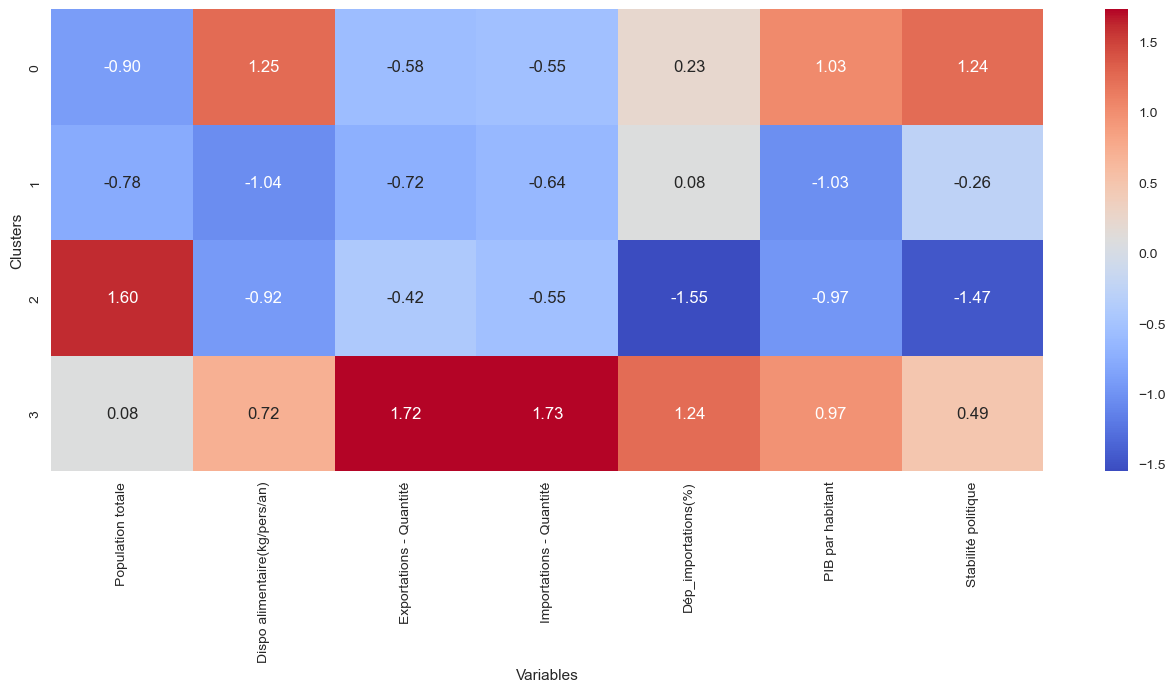

In [298]:
data_heatmap2 = clusterkms_averages
data_heatmap2=data_heatmap2[['Population totale','Dispo alimentaire(kg/pers/an)','Exportations - Quantité','Importations - Quantité','Dép_importations(%)','PIB par habitant','Stabilité politique']]
X3 = data_heatmap2.values
names3= data_heatmap2.index
features3= data_heatmap2.columns
# Centrage et Réduction
std_scale3 = preprocessing.StandardScaler().fit(X3)
X_scaled3 = std_scale3.transform(X3)
X_scaled3 = pd.DataFrame(X_scaled3)
X_scaled3.columns = list(features3)

# Définition des labels pour les clusters 
clusterslabel = ['0', '1', '2', '3']

# Création du heatmap
plt.figure(figsize=(16, 6))
p = sns.heatmap(X_scaled3, cmap='coolwarm', annot=True, yticklabels=clusterslabel, fmt=".2f")
p.set(xlabel="Variables", ylabel='Clusters')
plt.savefig('heatmapkmeans.png', dpi=300, bbox_inches='tight')
plt.show()

Le Cluster 3 se caractérise par les meilleurs indicateurs en termes d'importations et de taux de dépendance aux importations de volailles. Il affiche également d'excellents scores en disponibilité alimentaire et en produit intérieur brut (PIB), tout en jouissant d'un indice positif de stabilité politique.

## <font color='purple'>Boxplot de clustering <a class="anchor" id="section_4_5"></a>

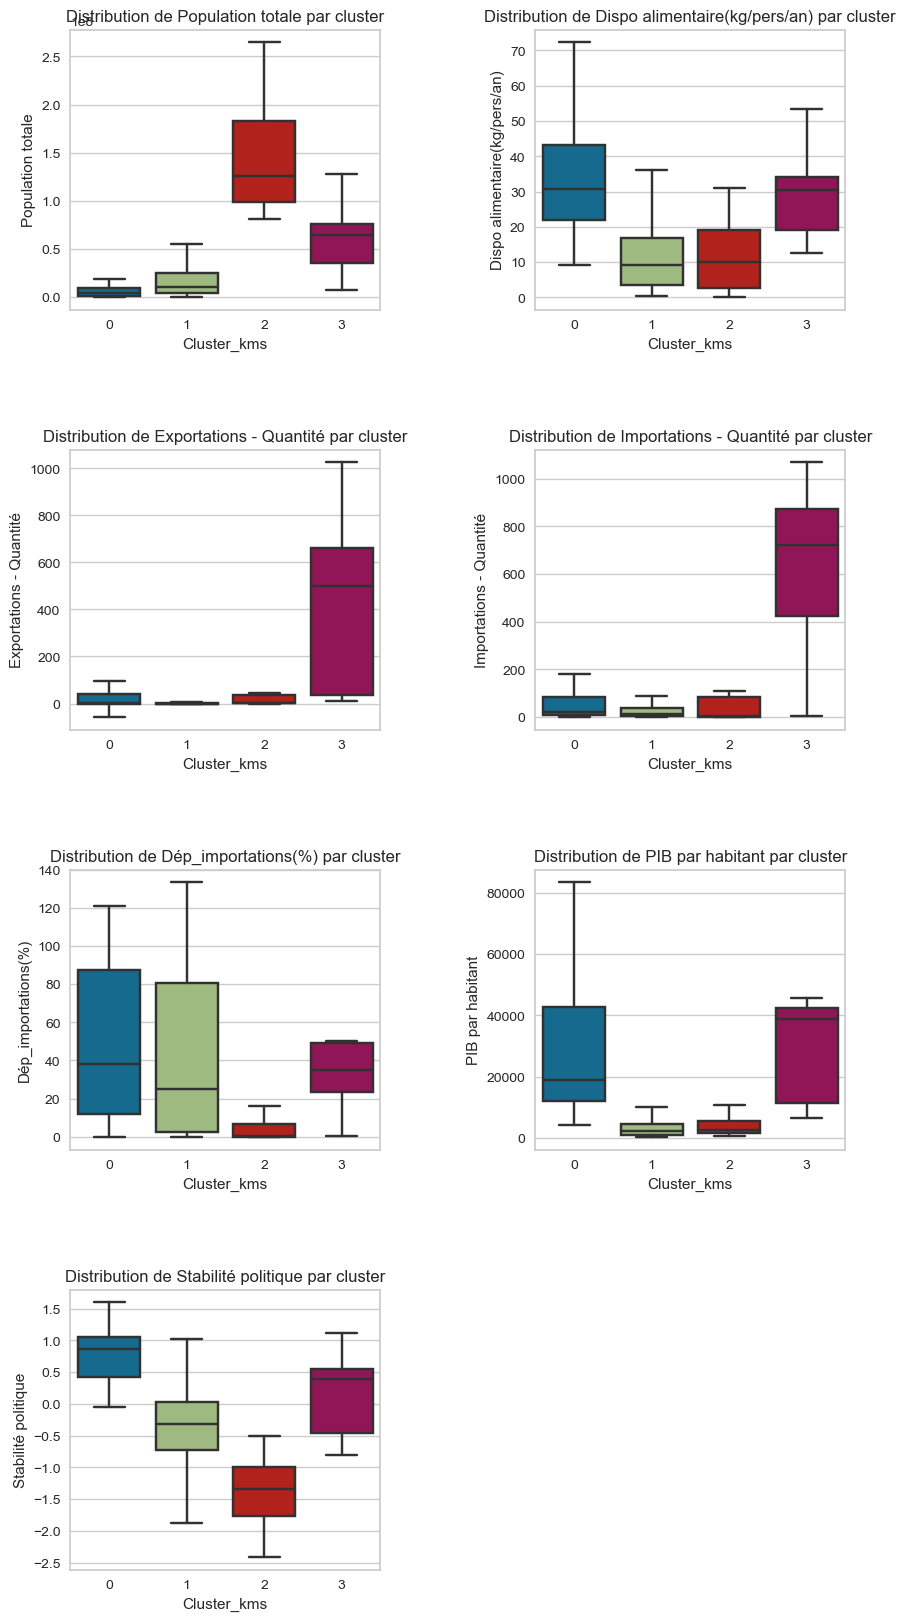

In [299]:
n = len(features)  # Le nombre total de caractéristiques à tracer

# Calculer le nombre de lignes nécessaires en supposant 2 colonnes
num_rows = (n + 1) // 2  # Utilisation de la division entière pour gérer les nombres impairs

# Créer une figure avec un nombre approprié de sous-graphiques
fig, ax = plt.subplots(num_rows, 2, figsize=(10, num_rows * 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Tracer les boxplots dans une grille de sous-graphiques
for i in range(n):
    row = i // 2  # Calculer l'index de la ligne
    col = i % 2   # Calculer l'index de la colonne
    sns.boxplot(data=df_poulet, x='Cluster_kms', y=features[i], ax=ax[row, col],showfliers = False,)
    ax[row, col].set_title(f"Distribution de {features[i]} par cluster")

# S'il y a un nombre impair de caractéristiques, supprimer le dernier sous-graphique inutilisé
if n % 2:
    fig.delaxes(ax[num_rows-1, 1])
    plt.savefig('boxplotkmeans.png', dpi=300, bbox_inches='tight')

**Interprétation heatmap et boxplot**
* Population totale: cluster 2 et **cluster 3**
* Dispo alimentaire(kg/pers/an): cluster 0 et **cluster 3**
* Exportations-Quantité: **cluster 3**
* Importations-Quantité: **cluster 3**
* Dép_importations: **cluster 3** et cluster 0
* PIB par habitant: cluster 0 et **cluster 3**
* Stabilité politique: cluster 0 et **cluster 3**

## <font color='purple'>Affichage des pays cibles <a class="anchor" id="section_4_6"></a>

In [300]:
# Extraction et affichage des pays cibles K-means
cluster_cible2 = df_poulet.loc[df_poulet['Cluster_kms'] ==3]
pays_cibles2 = cluster_cible2.index.get_level_values(0).tolist()
print("Pays cibles issue du cluster 3 pour la méthode du k-means sont : ")
print()
for item in pays_cibles2 :
    print(item)

Pays cibles issue du cluster 3 pour la méthode du k-means sont : 

Afrique du Sud
Allemagne
Arabie saoudite
Belgique
Chine - RAS de Hong-Kong
France
Japon
Mexique
Pologne
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
Thaïlande


In [301]:
# Extraction et affichage des pays cibles CAH 
cluster_cible = df_poulet.loc[df_poulet['Cluster_cah'] == 4]
pays_cibles = cluster_cible.index.get_level_values(0).tolist()
print("Pays à cibler issue du cluster 4 pour la méthode du CAH sont : ")
print()
for item in pays_cibles :
    print(item)

Pays à cibler issue du cluster 4 pour la méthode du CAH sont : 

Afrique du Sud
Allemagne
Arabie saoudite
Belgique
Chine - RAS de Hong-Kong
France
Japon
Mexique
Pologne
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
Thaïlande
Émirats arabes unis


# <font color='blue'>Conclusion <a class="anchor" id="chapter5"></a>

Nous remarquons que les mêmes pays ressortent dans nos deux méthodes de clustering, à l'exception des Émirats arabes unis.Par conséquent, il semble judicieux de cibler ces pays pour l'exportation de nos volailles.Cependant, il est recommandé de réaliser des analyses plus approfondies sur ces nations, en prenant en compte leur éloignement géographique de la France ainsi que les contraintes douanières et logistiques.